[View in Colaboratory](https://colab.research.google.com/github/lnarasimhan83/MachineLearning/blob/master/Devanagari.ipynb)

# **Import Libraries and modules**

In [140]:
# https://keras.io/
!pip install -q keras
import keras

In [141]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [142]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist

In [143]:
from scipy.misc import imread, imsave, imresize
from google.colab import files
import numpy as np
def upload_files():
  
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

In [144]:
list1 = upload_files()
print (list1)
train_file = list1[0]

Saving Swara_all_train.csv to Swara_all_train (1).csv
['Swara_all_train.csv']


In [172]:
raw_data = np.loadtxt(train_file, skiprows=1, dtype='int', delimiter=',')
x_train, x_val, y_train, y_val = train_test_split(
    raw_data[:,1:], raw_data[:,0], test_size=0.1)
#print (x_val[3])

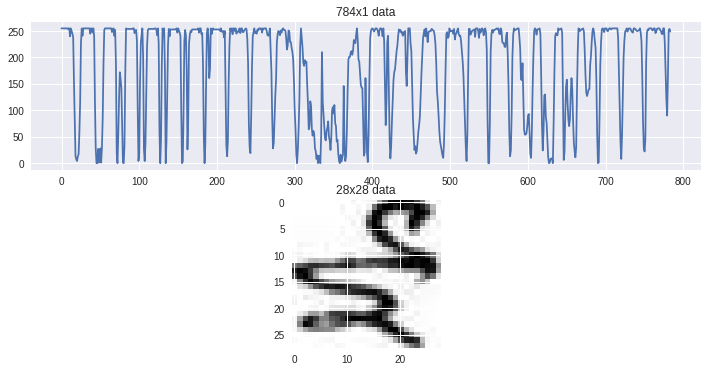

In [179]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(x_train[0])
ax[0].set_title('784x1 data')
ax[1].imshow(x_train[0].reshape(28,28), cmap='gray')
ax[1].set_title('28x28 data')
print (ax)

In [180]:
#x_train = x_train.reshape(-1, 28, 28, 1)
#x_val = x_val.reshape(-1, 28, 28, 1)  
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_val = x_val.reshape(x_val.shape[0], 28, 28,1)


In [181]:
x_train = x_train.astype("float32")/255.
x_val = x_val.astype("float32")/255.
#print (x_train[3])
#print (y_train[3])

In [149]:
y_train[:1]

array([6])

In [182]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
#y_train = np_utils.to_categorical(y_train, 10)
#y_val = np_utils.to_categorical(y_val, 10)
#example:
print(y_train[:9])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [183]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 5,5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(12, 4 ))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (5, 5), activation="relu")`
  import sys


In [184]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 10)        2890      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 8, 8, 10)          2510      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 10)          0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 1, 1, 12)          1932      
_________________________________________________________________
flatten_7 (Flatten)          (None, 12)                0         
__________

In [185]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [186]:
model.fit(x_train, y_train, batch_size=128, nb_epoch=25, verbose=1, validation_split=0.1, shuffle = True)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1895 samples, validate on 211 samples
Epoch 1/25
1895/1895 [==============================] - 1s 345us/step - loss: 2.4821 - acc: 0.1055 - val_loss: 2.4761 - val_acc: 0.0900
Epoch 2/25
1895/1895 [==============================] - 0s 106us/step - loss: 2.4543 - acc: 0.1625 - val_loss: 2.4320 - val_acc: 0.1659
Epoch 3/25
1895/1895 [==============================] - 0s 106us/step - loss: 2.3675 - acc: 0.2438 - val_loss: 2.2687 - val_acc: 0.2891
Epoch 4/25
1895/1895 [==============================] - 0s 105us/step - loss: 2.0822 - acc: 0.4042 - val_loss: 1.8014 - val_acc: 0.5261
Epoch 5/25
1895/1895 [==============================] - 0s 104us/step - loss: 1.6013 - acc: 0.5013 - val_loss: 1.4028 - val_acc: 0.5592
Epoch 6/25
1895/1895 [==============================] - 0s 110us/step - loss: 1.2963 - acc: 0.5620 - val_loss: 1.1938 - val_acc: 0.5924
Epoch 7/25
1895/1895 [==============================] - 0s 116us/step - loss: 1.1186 - acc: 0.6306 - val_loss: 1.1370 - val_acc: 0.6209
E

1895/1895 [==============================] - 0s 112us/step - loss: 0.4924 - acc: 0.8369 - val_loss: 0.5751 - val_acc: 0.8009
Epoch 18/25
1895/1895 [==============================] - 0s 115us/step - loss: 0.4683 - acc: 0.8480 - val_loss: 0.5466 - val_acc: 0.7915
Epoch 19/25
1895/1895 [==============================] - 0s 110us/step - loss: 0.4347 - acc: 0.8554 - val_loss: 0.4851 - val_acc: 0.8341
Epoch 20/25
1895/1895 [==============================] - 0s 112us/step - loss: 0.3962 - acc: 0.8786 - val_loss: 0.4767 - val_acc: 0.8578
Epoch 21/25
1895/1895 [==============================] - 0s 108us/step - loss: 0.3716 - acc: 0.8797 - val_loss: 0.4793 - val_acc: 0.8436
Epoch 22/25
1895/1895 [==============================] - 0s 114us/step - loss: 0.3511 - acc: 0.8876 - val_loss: 0.4490 - val_acc: 0.8199
Epoch 23/25
1895/1895 [==============================] - 0s 111us/step - loss: 0.3311 - acc: 0.8934 - val_loss: 0.4508 - val_acc: 0.8389
Epoch 24/25
1895/1895 [==============================

In [187]:
score = model.evaluate(x_val, y_val, verbose=1)

235/235 [==============================] - 0s 158us/step


In [188]:
print(score)

[0.4030208708123958, 0.8340425529378526]


In [189]:
y_pred = model.predict_classes(x_val)



In [164]:
print(y_pred[:3])
print(y_val[:3])

[10 10  5]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [192]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

#for k, v in layer_dict.items():
#    print(k)



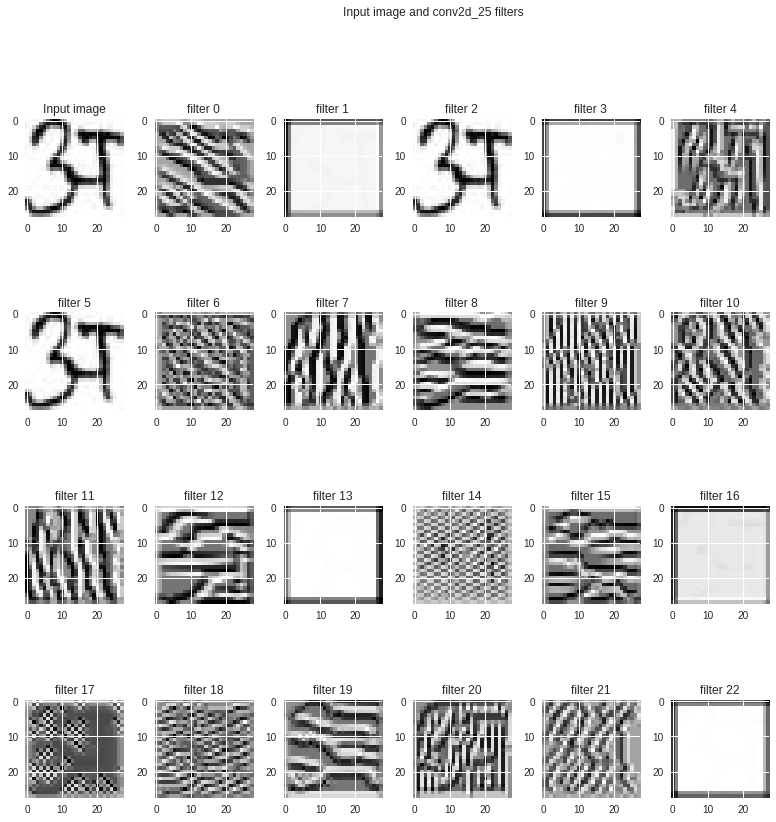

In [194]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(x_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_25' ):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()